In [27]:
import numpy as np
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from numpy.linalg import solve

In [28]:
def u_analytical(x, omega):
    A = np.array([
        [1.0, 1.0],
        [np.exp(omega), np.exp(-omega)]
    ])
    b = np.array([
        -2.0 / omega**4,
        -1.0 / omega**2 - 2.0 / omega**4
    ])
    C1, C2 = solve(A, b)

    return (
        C1 * np.exp(omega * x)
        + C2 * np.exp(-omega * x)
        + x**2 / omega**2
        + 2.0 / omega**4
    )

[0.0000e+00 0.0000e+00 3.2000e-05 7.2000e-05 1.2800e-04 2.0000e-04
 2.8800e-04 3.9200e-04 5.1200e-04 6.4800e-04 8.0000e-04 9.6800e-04
 1.1520e-03 1.3520e-03 1.5680e-03 1.8000e-03 2.0480e-03 2.3120e-03
 2.5920e-03 2.8880e-03 3.2000e-03 3.5280e-03 3.8720e-03 4.2320e-03
 4.6080e-03 5.0000e-03 5.4080e-03 5.8320e-03 6.2720e-03 6.7280e-03
 7.2000e-03 7.6880e-03 8.1920e-03 8.7120e-03 9.2480e-03 9.8000e-03
 1.0368e-02 1.0952e-02 1.1552e-02 1.2168e-02 1.2800e-02 1.3448e-02
 1.4112e-02 1.4792e-02 1.5488e-02 1.6200e-02 1.6928e-02 1.7672e-02
 1.8432e-02 1.9208e-02 1.0000e-02]
  (np.int32(0), np.int32(0))	6187500.01
  (np.int32(0), np.int32(1))	125000.0
  (np.int32(1), np.int32(0))	125000.0
  (np.int32(1), np.int32(1))	187500.02000000002
  (np.int32(1), np.int32(2))	125000.0
  (np.int32(2), np.int32(1))	125000.0
  (np.int32(2), np.int32(2))	250000.02
  (np.int32(2), np.int32(3))	125000.0
  (np.int32(3), np.int32(2))	125000.0
  (np.int32(3), np.int32(3))	250000.02
  (np.int32(3), np.int32(4))	125000

/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_71619/3587801716.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  A[i, j] = np.trapz(dphi(i, nodes) * dphi(j, nodes) + omega * phi(i, nodes) * phi(j, nodes) , nodes)
/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_71619/3587801716.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b[j] += np.trapz(f * phi(j, nodes), nodes)


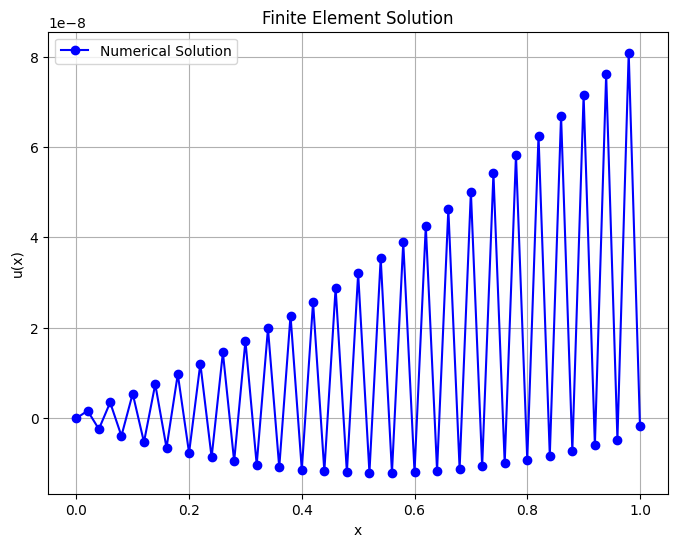

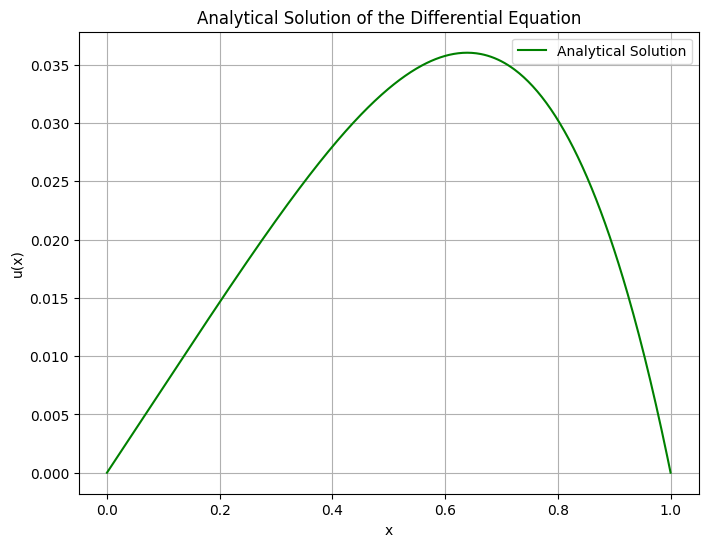

In [29]:

n = 50 # Number of intervals
h = 1 / n # Length of each interval
nodes = np.linspace(0, 1, n + 1) # Nodes
omega = 1.0  

def phi(i, x):
    if i == 0:
        return np.maximum(1 - n * np.abs(x - nodes[i]) / h, 0)
    elif i == n:
        return np.maximum(1 - n * np.abs(x - nodes[i]) / h, 0)
    else:
        return np.maximum(1 - n * np.abs(x - nodes[i]) / h, 0)
    
def dphi(i, x):
    if i == 0:
        return -n / h * np.sign(x - nodes[i])
    elif i == n:
        return n / h * np.sign(x - nodes[i])
    else:
        return n / h * (np.sign(x - nodes[i]) - np.sign(x - nodes[i - 1]))
    

# Assemble stiffness matrix A and load vector b
A = lil_matrix((n + 1, n + 1))
b = np.zeros(n + 1)

# Assemble stiffness matrix A
for i in range(n + 1):
    for j in range(n + 1):
        if abs(i - j) <= 1:
            A[i, j] = np.trapz(dphi(i, nodes) * dphi(j, nodes) + omega * phi(i, nodes) * phi(j, nodes) , nodes)



# Boundary terms for load vector b
b = np.zeros(n + 1)

# Assemble load vector b for f= x**2
f = nodes**2
for j in range(n + 1):
    if(j>1): 
        b[j] += np.trapz(f * phi(j, nodes), nodes)

print(b)




# Convert A to a csr_matrix for efficient linear algebra operations
A = A.tocsr()


print(A)

# Solve the linear system
u = spsolve(A, b)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(nodes, u, marker='o', linestyle='-', color='b', label='Numerical Solution')
plt.title('Finite Element Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

 
# Generate points for plotting the analytical solution
x_analytical = np.linspace(0, 1, 500)
u_analytical_values = np.array([u_analytical(x, omega) for x in x_analytical])

# Plotting the analytical solution
plt.figure(figsize=(8, 6))
plt.plot(x_analytical, u_analytical_values, label='Analytical Solution', color='g', linestyle='-')
plt.title('Analytical Solution of the Differential Equation')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()

/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_71619/1276555441.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  stiffness = np.trapz(dphi(i, nodes) * dphi(j, nodes), nodes)
/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_71619/1276555441.py:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mass = np.trapz(phi(i, nodes) * phi(j, nodes), nodes)
/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_71619/1276555441.py:44: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  bvec[j] = np.trapz(nodes**2 * phi(j, nodes), nodes)


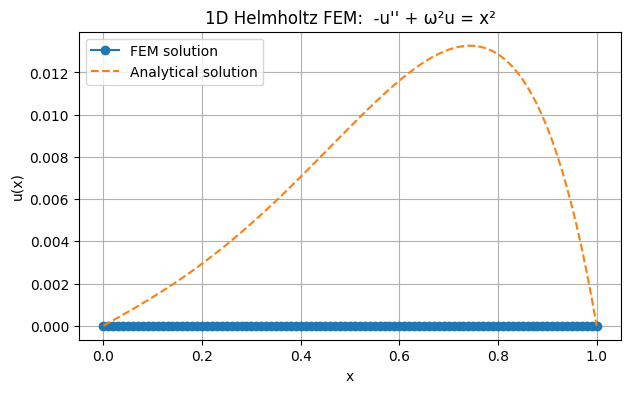